# MNIST


## 1. Importing

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# Macbook chip M
from tensorflow.keras.optimizers.legacy import SGD
# Ordinary computer
#from tensorflow.keras.optimizers import SGD

## 2. Load data and pre-process

Label:  5
One-hot vector:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


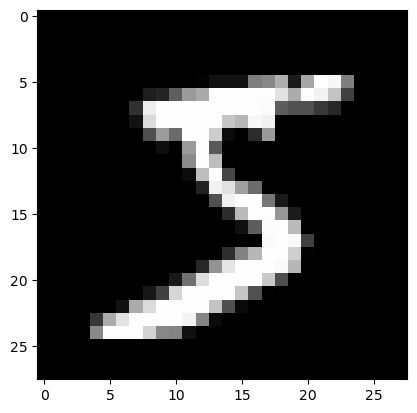

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Image size and input size
image_size = x_train.shape[1:]
input_size = image_size[0] * image_size[1]

# Number of classes
num_labels = len(np.unique(y_train))

# Covert to one-hot
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

# Flatten image
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

# Normalize data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Visualize
plt.imshow(x_train[0].reshape(image_size), cmap='gray')
print('Label: ', np.argmax(y_train[0]))
print('One-hot vector: ', y_train[0])

## 3. Design model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


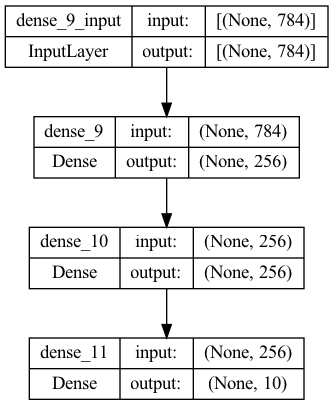

In [6]:
model = Sequential()

model.add(Dense(units=256, input_dim=input_size, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=num_labels, activation='softmax'))

model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

## 4. Train model

Epoch 1/50
469/469 [==============================] - 1s 1ms/step - loss: 0.4288 - accuracy: 0.8794 - val_loss: 0.2397 - val_accuracy: 0.9292
Epoch 2/50
469/469 [==============================] - 1s 1ms/step - loss: 0.1995 - accuracy: 0.9427 - val_loss: 0.1670 - val_accuracy: 0.9501
Epoch 3/50
469/469 [==============================] - 1s 1ms/step - loss: 0.1466 - accuracy: 0.9572 - val_loss: 0.1268 - val_accuracy: 0.9596
Epoch 4/50
469/469 [==============================] - 1s 1ms/step - loss: 0.1158 - accuracy: 0.9662 - val_loss: 0.1208 - val_accuracy: 0.9623
Epoch 5/50
469/469 [==============================] - 1s 1ms/step - loss: 0.0956 - accuracy: 0.9725 - val_loss: 0.1034 - val_accuracy: 0.9670
Epoch 6/50
469/469 [==============================] - 1s 1ms/step - loss: 0.0808 - accuracy: 0.9765 - val_loss: 0.0877 - val_accuracy: 0.9734
Epoch 7/50
469/469 [==============================] - 1s 1ms/step - loss: 0.0694 - accuracy: 0.9802 - val_loss: 0.0870 - val_accuracy: 0.9725
Epoch 

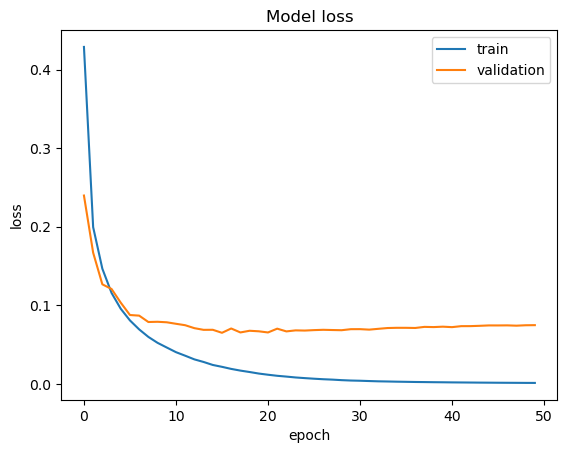

In [6]:
tf.random.set_seed(42)

sgd = SGD(0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
h = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=50,
              batch_size=128)

# Summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## 5. Evaluate on test set

In [7]:
loss, acc = model.evaluate(x_test, y_test, batch_size=128, verbose=False)
print(f"\nTest accuracy: {acc * 100}")


Test accuracy: 98.17000031471252


# XOR Problem

In [24]:
# 1. Importing
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# Macbook chip M
from tensorflow.keras.optimizers.legacy import SGD
# Ordinary computer
#from tensorflow.keras.optimizers import SGD

In [25]:
# 2. Prepare dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

print(f"The input shape is: {X.shape}")
print(f"The output shape is: {Y.shape}")

The input shape is: (4, 2)
The output shape is: (4, 1)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 15        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


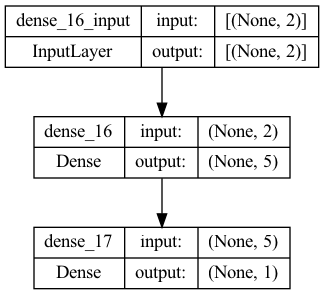

In [26]:
# 3. Design model
model = Sequential()

input_size = X.shape[1]

model.add(Dense(units=5, input_dim=input_size, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()
plot_model(model, to_file='mlp-xor.png', show_shapes=True)

Epoch 1/50


1/1 [==============================] - 0s 93ms/step - loss: 0.6282 - accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 1.0000
Epoch 11/50
1/1 [==============================] 

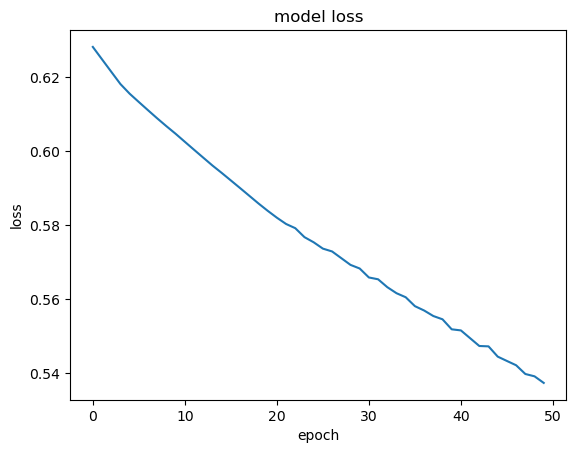

In [28]:
# 4. Train model
tf.random.set_seed(42)

sgd = SGD(0.1)

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
h = model.fit(X, Y, epochs=50, batch_size=4)
# summarize history for loss
plt.plot(h.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [35]:
# 4. Evaluating

predictions = model.predict(X).round()
print(tf.cast(predictions, tf.int32))

1/1 [==============================] - 0s 9ms/step
tf.Tensor(
[[0]
 [1]
 [1]
 [0]], shape=(4, 1), dtype=int32)
